# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
# import libraries here
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [2]:
# your answer here
temp = pd.read_csv('./Temp_States.csv', index_col=0)

#### Print `temp`

In [3]:
print(temp)

                  State  Temperature
City                                
NYC            New York    19.444444
Albany         New York     9.444444
Buffalo        New York     3.333333
Hartford    Connecticut    17.222222
Bridgeport  Connecticut    14.444444
Treton       New Jersey    22.222222
Newark       New Jersey    20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [4]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, NYC to Newark
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   State        7 non-null      object 
 1   Temperature  7 non-null      float64
dtypes: float64(1), object(1)
memory usage: 168.0+ bytes


#### Select the rows where state is New York

In [5]:
nyc = temp[temp.State == "New York"]
nyc

,State,Temperature
City,,
NYC,New York,19.444444
Albany,New York,9.444444
Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [6]:
round(nyc.mean(),2)

Temperature    10.74
dtype: float64

#### We want to know cities and states with Temperature above 15 degress Celcius

In [7]:
c_s_15 = temp[temp.Temperature > 15]
c_s_15

,State,Temperature
City,,
NYC,New York,19.444444
Hartford,Connecticut,17.222222
Treton,New Jersey,22.222222
Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [8]:
c = temp[temp.Temperature > 15]
c.iloc[:,1]

City
NYC         19.444444
Hartford    17.222222
Treton      22.222222
Newark      20.000000
Name: Temperature, dtype: float64

#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [9]:
cities1520 = temp[(temp.Temperature>15) & (temp.Temperature<20)]
cities1520

,State,Temperature
City,,
NYC,New York,19.444444
Hartford,Connecticut,17.222222


#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [10]:
state_mean = temp.groupby("State").Temperature.mean()
print(state_mean)

State
Connecticut    15.833333
New Jersey     21.111111
New York       10.740741
Name: Temperature, dtype: float64


In [11]:
state_sd = temp.groupby("State").Temperature.std()
print(state_sd)

State
Connecticut    1.964186
New Jersey     1.571348
New York       8.133404
Name: Temperature, dtype: float64


In [12]:
temp.describe()

,Temperature
count,7.000000
mean,15.158730
std,6.695265
min,3.333333
25%,11.944444
50%,17.222222
75%,19.722222
max,22.222222


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [54]:
employee = pd.read_csv('./employee.csv', index_col=0)
employee

,Department,Education,Gender,Title,Years,Salary
Name,,,,,,
Jose,IT,Bachelor,M,analyst,1,35
Maria,IT,Master,F,analyst,2,30
David,HR,Master,M,analyst,2,30
Sonia,HR,Bachelor,F,analyst,4,35
Samuel,Sales,Master,M,associate,3,55
Eva,Sales,Bachelor,F,associate,2,55
Carlos,IT,Master,M,VP,8,70
Pedro,IT,Phd,M,associate,7,60
Ana,HR,Master,F,VP,8,70


#### Explore the data types of the Temp dataframe. Comment your results

In [53]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, Jose to Ana
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Department  9 non-null      object
 1   Education   9 non-null      object
 2   Gender      9 non-null      object
 3   Title       9 non-null      object
 4   Years       9 non-null      int64 
 5   Salary      9 non-null      int64 
dtypes: int64(2), object(4)
memory usage: 504.0+ bytes


#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

array([[<AxesSubplot:title={'center':'Years'}>]], dtype=object)

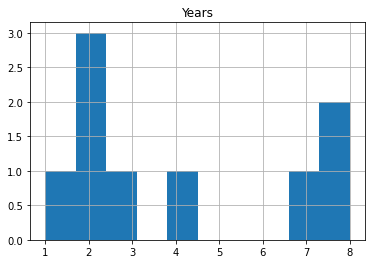

In [57]:
employee.hist('Years')

Most of the employees have been in the company around 2 years. However, 2 employees have been 8 years in the company.

array([[<AxesSubplot:title={'center':'Salary'}>]], dtype=object)

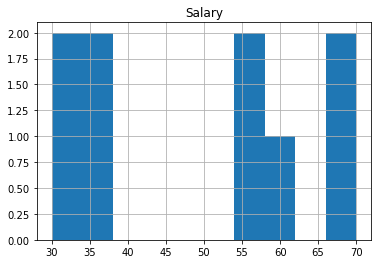

In [55]:
employee.hist('Salary')

There are 5 main bins of an emplyee's salary: 30k, 35k, 55k, 60k and 70k.

#### What's the average salary in this company?

In [59]:
avg_salary = round((employee.Salary).mean(), 2)
avg_salary

48.89

#### What's the highest salary?

In [60]:
max_salary = (employee.Salary).max()
max_salary

70

#### What's the lowest salary?

In [61]:
min_salary = (employee.Salary).min()
min_salary

30

#### Who are the employees with the lowest salary?

The employees with the lowest salaries are the analysts


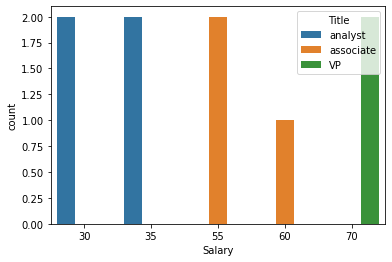

In [62]:
sns.countplot(x=employee.Salary, hue=employee.Title)
print("The employees with the lowest salaries are the analysts")

#### Could you give all the information about an employee called David?

In [63]:
David = employee.loc["David"]
David

Department         HR
Education      Master
Gender              M
Title         analyst
Years               2
Salary             30
Name: David, dtype: object

#### Could you give only David's salary?

In [65]:
David_salary = David.Salary
David_salary

30

#### Print all the rows where job title is associate

In [66]:
jt = employee[employee.Title == "associate"]
jt

,Department,Education,Gender,Title,Years,Salary
Name,,,,,,
Samuel,Sales,Master,M,associate,3,55
Eva,Sales,Bachelor,F,associate,2,55
Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [68]:
employee.head(3)

,Department,Education,Gender,Title,Years,Salary
Name,,,,,,
Jose,IT,Bachelor,M,analyst,1,35
Maria,IT,Master,F,analyst,2,30
David,HR,Master,M,analyst,2,30


In [67]:
employee.head()[:3]

,Department,Education,Gender,Title,Years,Salary
Name,,,,,,
Jose,IT,Bachelor,M,analyst,1,35
Maria,IT,Master,F,analyst,2,30
David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [69]:
associate_55= employee[(employee.Title == "associate") & (employee.Salary > 55)]
associate_55

,Department,Education,Gender,Title,Years,Salary
Name,,,,,,
Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [78]:
years_salaries = employee.groupby("Years").Salary.mean()
print(years_salaries)

Years
1    35.000000
2    38.333333
3    55.000000
4    35.000000
7    60.000000
8    70.000000
Name: Salary, dtype: float64


####  What is the average Salary per title?

In [79]:
title_salaries = employee.groupby("Title").Salary.mean()
print(title_salaries)

Title
VP           70.000000
analyst      32.500000
associate    56.666667
Name: Salary, dtype: float64


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

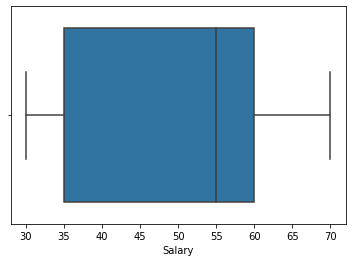

In [80]:
sns.boxplot(x="Salary",  data=employee)
plt.show()

In [82]:
# print first quartile here
employee.Salary.quantile(0.25)

35.0

In [83]:
# print third quartile here
employee.Salary.quantile(0.75)

60.0

#### Is the mean salary per gender different?

In [84]:
gender_salaries = employee.groupby("Gender").Salary.mean()
print(gender_salaries)

Gender
F    47.5
M    50.0
Name: Salary, dtype: float64


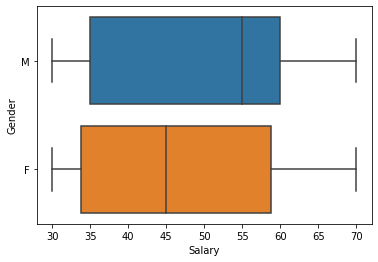

In [85]:
sns.boxplot(x="Salary",  
            y="Gender",
            data=employee)
plt.show()

#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [86]:
employee.groupby("Department").agg({"Years": [min, max, np.mean], "Salary": [min, max, np.mean]})

Years               Salary           
             min max      mean    min max   mean
Department                                      
HR             2   8  4.666667     30  70  45.00
IT             1   8  4.500000     30  70  48.75
Sales          2   3  2.500000     55  55  55.00

### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [88]:
max_min_sal = employee.groupby("Department")["Salary"].apply(lambda x: x.max() - x.min())
max_min_sal

Department
HR       40
IT       40
Sales     0
Name: Salary, dtype: int64

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [92]:
orders = pd.read_csv('./Orders.csv', index_col=0)
orders.head(4)

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [93]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   InvoiceNo     397924 non-null  int64  
 1   StockCode     397924 non-null  object 
 2   year          397924 non-null  int64  
 3   month         397924 non-null  int64  
 4   day           397924 non-null  int64  
 5   hour          397924 non-null  int64  
 6   Description   397924 non-null  object 
 7   Quantity      397924 non-null  int64  
 8   InvoiceDate   397924 non-null  object 
 9   UnitPrice     397924 non-null  float64
 10  CustomerID    397924 non-null  int64  
 11  Country       397924 non-null  object 
 12  amount_spent  397924 non-null  float64
dtypes: float64(2), int64(7), object(4)
memory usage: 42.5+ MB


####  What is the average Purchase Price?

In [95]:
purch_price_avg = round((orders.amount_spent).mean(), 2)
purch_price_avg

22.39

#### What were the highest and lowest purchase prices? 

In [98]:
purch_price_max = round((orders.amount_spent).max(), 2)
purch_price_max

168469.6

In [99]:
purch_price_min = round((orders.amount_spent).min(), 2)
purch_price_min

0.0

#### Select all the customers we have in Spain

In [104]:
cust_spa = orders[orders.Country == "Spain"]
cust_spa

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.00
6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
535271,581193,23291,2011,12,3,17,dolly girl childrens cup,2,2011-12-07 17:05:00,1.25,17097,Spain,2.50
535272,581193,85232D,2011,12,3,17,set/3 decoupage stacking tins,1,2011-12-07 17:05:00,4.95,17097,Spain,4.95
535273,581193,22721,2011,12,3,17,set of 3 cake tins sketchbook,2,2011-12-07 17:05:00,1.95,17097,Spain,3.90
535274,581193,23241,2011,12,3,17,treasure tin gymkhana design,1,2011-12-07 17:05:00,2.08,17097,Spain,2.08


#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [106]:
spa_cust_numb = cust_spa.CustomerID.value_counts().sum()
spa_cust_numb

2485

#### Select all the customers who have bought more than 50 items ?

In [108]:
cust = orders.groupby("CustomerID").count()
cust_50 = cust.get(cust.Quantity > 50)
cust_50

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,Country,amount_spent
CustomerID,,,,,,,,,,,,
12347,182,182,182,182,182,182,182,182,182,182,182,182
12349,73,73,73,73,73,73,73,73,73,73,73,73
12352,85,85,85,85,85,85,85,85,85,85,85,85
12354,58,58,58,58,58,58,58,58,58,58,58,58
12356,59,59,59,59,59,59,59,59,59,59,59,59
...,...,...,...,...,...,...,...,...,...,...,...,...
18260,134,134,134,134,134,134,134,134,134,134,134,134
18263,61,61,61,61,61,61,61,61,61,61,61,61
18272,166,166,166,166,166,166,166,166,166,166,166,166


#### Select orders from Spain that are above 50 items

In [111]:
cust_spa_50 = cust_spa[(cust_spa.Quantity > 50)]
cust_spa_50.head(4)

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0
6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.0
6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5


#### Select all free orders

In [112]:
free = orders[orders.UnitPrice == 0]
free.head(4)

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
9302,537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
33576,539263,22580,2010,12,4,14,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0
40089,539722,22423,2010,12,2,13,regency cakestand 3 tier,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0
47068,540372,22090,2011,1,4,16,paper bunting retrospot,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [113]:
lunchbag = orders[orders.Description.str.contains("lunch bag")]
lunchbag.head(4)

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
93,536378,20725,2010,12,3,9,lunch bag red retrospot,10,2010-12-01 09:37:00,1.65,14688,United Kingdom,16.50
174,536385,22662,2010,12,3,9,lunch bag dolly girl design,10,2010-12-01 09:56:00,1.65,17420,United Kingdom,16.50
363,536401,22662,2010,12,3,11,lunch bag dolly girl design,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
368,536401,20725,2010,12,3,11,lunch bag red retrospot,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [116]:
lunchbag_2011 = orders[(orders.Description.str.contains("lunch bag")) & (orders.year == 2011)]
lunchbag_2011.head(4)

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
42678,540015,20725,2011,1,2,11,lunch bag red retrospot,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
42679,540015,20726,2011,1,2,11,lunch bag woodland,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
42851,540023,22382,2011,1,2,12,lunch bag spaceboy design,2,2011-01-04 12:58:00,1.65,15039,United Kingdom,3.30
42852,540023,20726,2011,1,2,12,lunch bag woodland,1,2011-01-04 12:58:00,1.65,15039,United Kingdom,1.65


#### Show the frequency distribution of the amount spent in Spain.

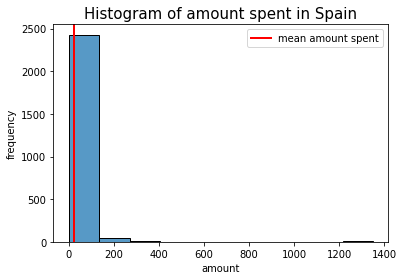

In [128]:
# plot hist
fig, ax = plt.subplots()

sns.histplot(cust_spa.amount_spent, bins=10)

# plot the mean
plt.axvline(
    cust_spa.amount_spent.mean(),
    c="red",
    linewidth= 2,
    linestyle='-',
    label='mean amount spent'
)

plt.title('Histogram of amount spent in Spain', size=15)
plt.xlabel('amount')
plt.ylabel('frequency')
plt.legend()
plt.show()

#### Select all orders made in the month of August

In [129]:
august = orders[orders.month == 8]
august.head(4)

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
285421,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
285422,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36
285423,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40
285424,561905,84970L,2011,8,1,9,single heart zinc t-light holder,12,2011-08-01 09:31:00,0.95,14947,United Kingdom,11.40


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [131]:
august_countries = orders.groupby("Country").count()

In [134]:
august_countries.get(august_countries.month == 8)
august_countries.head(4)

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,amount_spent
Country,,,,,,,,,,,,
Australia,1185,1185,1185,1185,1185,1185,1185,1185,1185,1185,1185,1185
Austria,398,398,398,398,398,398,398,398,398,398,398,398
Bahrain,17,17,17,17,17,17,17,17,17,17,17,17
Belgium,2031,2031,2031,2031,2031,2031,2031,2031,2031,2031,2031,2031


#### What's the  average amount of money spent by country

In [135]:
avg_country = orders.groupby("Country").amount_spent.mean()
avg_country

Country
Australia               116.895620
Austria                  25.624824
Bahrain                  32.258824
Belgium                  20.283772
Brazil                   35.737500
Canada                   24.280662
Channel Islands          27.340160
Cyprus                   22.134169
Czech Republic           33.069600
Denmark                  49.882474
EIRE                     36.687745
European Community       21.670833
Finland                  32.913985
France                   25.056827
Germany                  25.311562
Greece                   32.831172
Iceland                  23.681319
Israel                   29.119718
Italy                    23.064960
Japan                   116.561900
Lebanon                  37.641778
Lithuania                47.458857
Malta                    24.335625
Netherlands             120.798282
Norway                   33.736418
Poland                   22.226212
Portugal                 22.872702
RSA                      17.281207
Saudi Arabia

#### What's the most expensive item?

In [137]:
cost_item = orders.UnitPrice.max()
cost_item

8142.75

In [138]:
expensive_item = orders.loc[orders["UnitPrice"] == 8142.75]
expensive_item

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
173382,551697,POST,2011,5,2,13,postage,1,2011-05-03 13:46:00,8142.75,16029,United Kingdom,8142.75


#### What was the average amount spent per year ?

In [139]:
avg_amount_year = orders.groupby("year").amount_spent.mean()
avg_amount_year

year
2010    21.892733
2011    22.430074
Name: amount_spent, dtype: float64